# Exrecise High paying Skills

## importing and Cleaning Data

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
data = dataset['train'].to_pandas()
df = data.copy()

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

### Data Frame of United States of Data Analyst

In [ ]:
# get data analyst job in US
df_DA_US=df[(df['job_title_short']=='Data Analyst')&(df['job_country']=='United States')]

# Drop Nan values in salary year average
df_DA_US = df_DA_US.dropna(subset='salary_year_avg')

In [ ]:
df_DA_US = df_DA_US.explode('job_skills')

In [ ]:
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DA_US_top_skills = df_DA_US_group.sort_values(
    by='count', ascending=False).head(10)
df_DA_US_top_pay = df_DA_US_group.sort_values(
    by='median', ascending=False).head(10)

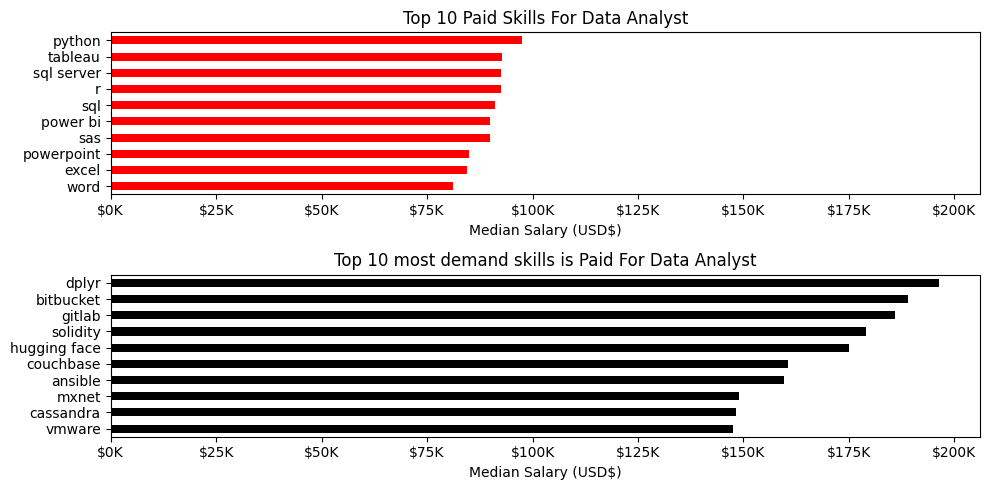

In [ ]:
fig,ax = plt.subplots(2,1)

df_DA_US_top_pay[::-1].plot(kind='barh', y='median', ax=ax[1], color='black',legend=False)
df_DA_US_top_skills.sort_values(by='median').plot(kind='barh', y='median',ax=ax[0],color='red',legend=False)

ax[0].set_title('Top 10 Paid Skills For Data Analyst')
ax[0].set_xlabel('Median Salary (USD$)')
ax[0].set_ylabel('')
ax[0].set_xlim(ax[1].get_xlim())
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))


ax[1].set_title('Top 10 most demand skills is Paid For Data Analyst')
ax[1].set_xlabel('Median Salary (USD$)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.set_size_inches(10,5)
fig.tight_layout()

### Data Frame of United States of Data Scientist

In [5]:
df_DS_US = df[(df['job_country'] =='United States')&(df['job_title_short'] =='Data Scientist')]

In [6]:
df_DS_US = df_DS_US.explode('job_skills')
df_DS_US = df_DS_US.dropna(subset='salary_year_avg')

In [7]:
df_DS_US_group=df_DS_US.groupby('job_skills')['salary_year_avg'].agg(['count','median'])
df_DS_US_top_skills = df_DS_US_group.sort_values(by='count',ascending=False).head(10)
df_DS_US_top_pay = df_DS_US_group.sort_values(by='median',ascending=False).head(10)
df_DS_US_top_skills = df_DS_US_top_skills.sort_values(
    by='median', ascending=False)

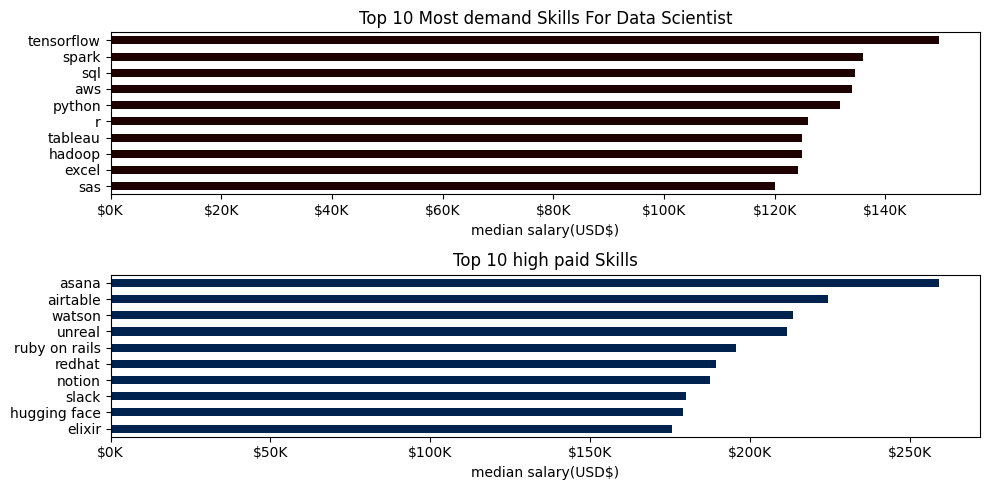

In [ ]:
fig,ax=plt.subplots(2,1)

df_DS_US_top_skills[::-1].plot(kind='barh',y='median',ax=ax[0],legend=False,colormap='pink')
df_DS_US_top_pay[::-1].plot(kind='barh',y='median',ax=ax[1],legend=False,colormap='cividis')

ax[0].set_title('Top 10 Most demand Skills For Data Scientist')
ax[0].set_ylabel('')
ax[0].set_xlabel('median salary(USD$)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

ax[1].set_title('Top 10 high paid Skills')
ax[1].set_ylabel('')
ax[1].set_xlabel('median salary(USD$)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))

fig.set_size_inches(10,5)
fig.tight_layout()

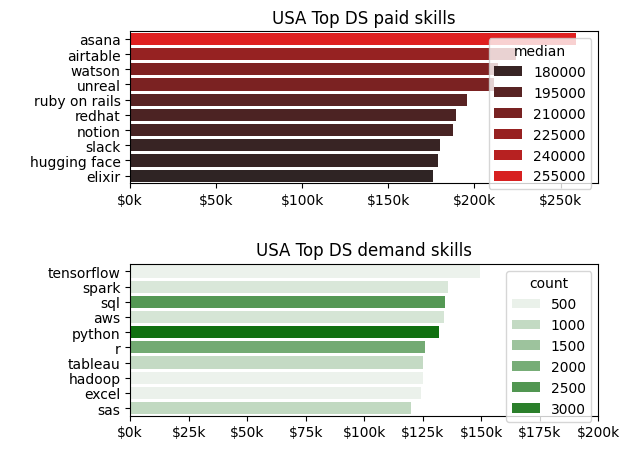

In [8]:
fig,ax=plt.subplots(2,1)
sns.barplot(data=df_DS_US_top_pay,x='median',y=df_DS_US_top_pay.index,ax=ax[0],hue='median',palette='dark:r')
ax[0].set_ylabel(' ')
ax[0].set_xlabel(' ')
ax[0].set_title('USA Top DS paid skills')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"${int(x/1000)}k"))

sns.barplot(data=df_DS_US_top_skills,x='median',ax=ax[1],hue='count',y=df_DS_US_top_skills.index,palette='light:g')
ax[1].set_ylabel(' ')
ax[1].set_xlabel(' ')
ax[1].set_title('USA Top DS demand skills')
ax[1].set_xlim(0,200000)
ax[1].xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"${int(x/1000)}k"))


plt.tight_layout()
plt.show()